# Generatring Time Series Data For Darts


This notebook is used to generate time series data for the Darts library. it should give an introduction for how to generate synthetic time series data. This is in particular useful for time series forecasting experiments and narrowirng down the best approach for a given problem. 


Most of the documentation can be fount [here](https://unit8co.github.io/darts/generated_api/darts.utils.timeseries_generation.html)

### Import libraries


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from darts.utils.timeseries_generation import (
                                               autoregressive_timeseries,
                                               constant_timeseries,
                                               datetime_attribute_timeseries,
                                               gaussian_timeseries,
                                               linear_timeseries,
                                               sine_timeseries,
)

### Config 

Config for the remaining timeseries generation 


In [24]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate a date range
start_date = pd.Timestamp("2023-01-01")
end_date = pd.Timestamp("2023-12-31")
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

display (start_date, end_date, date_range)

Timestamp('2023-01-01 00:00:00')

Timestamp('2023-12-31 00:00:00')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

## Constant Time Series:
This is the simplest form of time series.
It generates a series where every value is the same (100 in this case).
Useful for baseline comparisons or representing steady-state scenarios.

In [8]:
constant_ts = constant_timeseries(
    start=start_date,
    end=end_date,
    freq='D',
    value=100
)

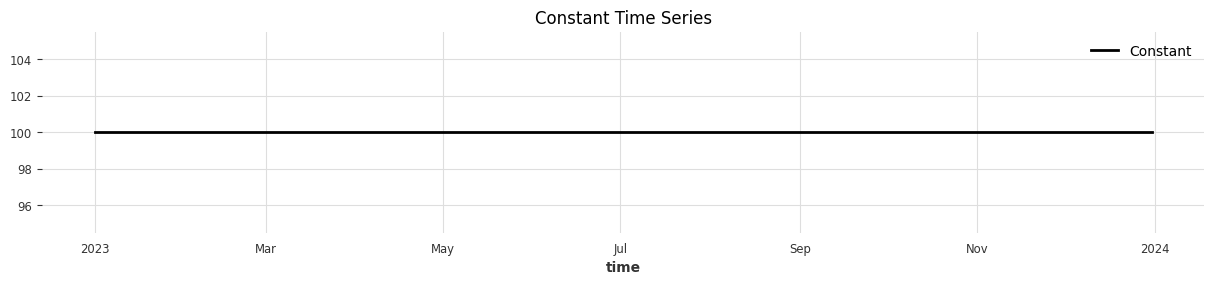

In [9]:
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
constant_ts.plot(label='Constant')
plt.title('Constant Time Series')
plt.legend()

## Linear Time Series:
Creates a series with a linear trend.
Starts at a specified value (0) and ends at another value (100).
The values between start and end follow a straight line.
Useful for modeling steady growth or decline over time.

In [10]:
linear_ts = linear_timeseries(
    start=start_date,
    end=end_date,
    freq='D',
    start_value=0,
    end_value=100
)


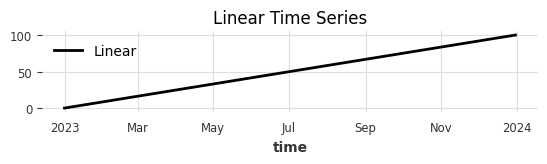

In [11]:
plt.subplot(4, 1, 2)
linear_ts.plot(label='Linear')
plt.title('Linear Time Series')
plt.legend()

In [17]:
ar_ts = autoregressive_timeseries(
    start=start_date,
    end=end_date,
    freq='D',
    coef=[0.9])


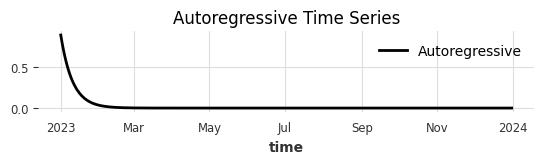

In [18]:
plt.subplot(4, 1, 4)
ar_ts.plot(label='Autoregressive')
plt.title('Autoregressive Time Series')
plt.legend()

In [4]:

# Generate different types of time series
# 1. Gaussian time series
gaussian_ts = gaussian_timeseries(
    start=start_date,
    end=end_date,
    freq='D',
    mean=100,
    std=20
)

Gaussian Time Series Values:
component     gaussian
time                  
2023-01-01  109.934283
2023-01-02   97.234714
2023-01-03  112.953771
2023-01-04  130.460597
2023-01-05   95.316933
...                ...
2023-12-27  110.386930
2023-12-28  130.654778
2023-12-29   97.824797
2023-12-30  108.034234
2023-12-31  113.802880

[365 rows x 1 columns]


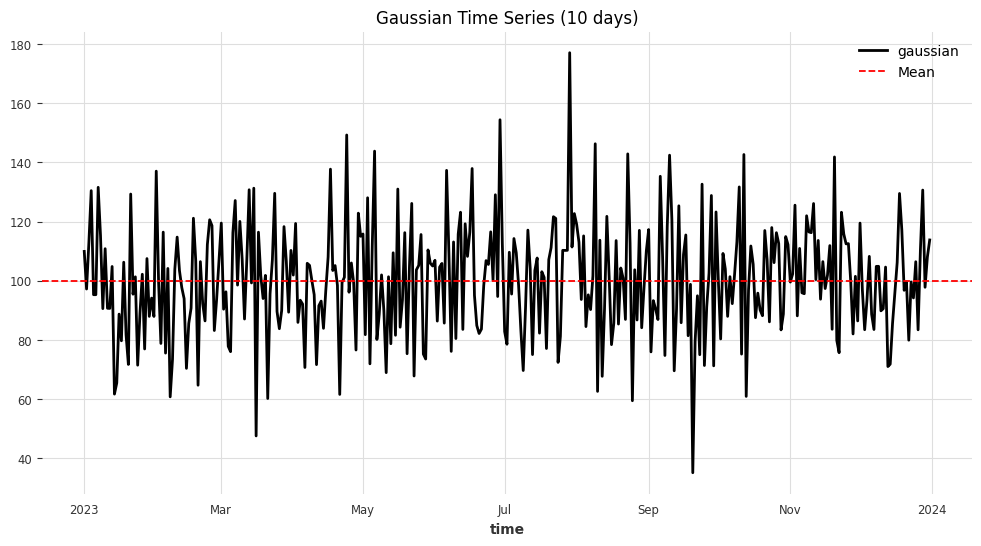

In [6]:
# Display the time series values
print("Gaussian Time Series Values:")
print(gaussian_ts.pd_dataframe())

# Plot the time series
plt.figure(figsize=(12, 6))
gaussian_ts.plot()
plt.title('Gaussian Time Series (10 days)')
plt.axhline(y=100, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [23]:
sine_ts = sine_timeseries(
    start=start_date,
    end=end_date,
    freq='D',
    value_frequency=1/365,  # One cycle per year
    value_amplitude=20,
    value_y_offset=100
)

In [1]:
dow_ts = datetime_attribute_timeseries(

    # start=start_date,

    # end=end_date,
    freq='D',
    attribute='day_of_week'
)

NameError: name 'datetime_attribute_timeseries' is not defined

In [19]:
# Combine time series to create a complex pattern
combined_ts = gaussian_ts + sine_ts + linear_ts * 0.1 + dow_ts * 5

# Plotting
plt.figure(figsize=(15, 20))

plt.subplot(6, 1, 1)
constant_ts.plot(label='Constant')
plt.title('Constant Time Series')
plt.legend()

plt.subplot(6, 1, 2)
linear_ts.plot(label='Linear')
plt.title('Linear Time Series')
plt.legend()

plt.subplot(6, 1, 3)
gaussian_ts.plot(label='Gaussian')
plt.title('Gaussian Time Series')
plt.legend()

plt.subplot(6, 1, 4)
ar_ts.plot(label='Autoregressive')
plt.title('Autoregressive Time Series')
plt.legend()

plt.subplot(6, 1, 5)
sine_ts.plot(label='Sine')
plt.title('Sine Time Series')
plt.legend()

plt.subplot(6, 1, 6)
combined_ts.plot(label='Combined')
plt.title('Combined Time Series')
plt.legend()

plt.tight_layout()
plt.show()

# Save the combined time series to a CSV file
#combined_ts.to_csv('combined_timeseries.csv')

#print("Time series data has been generated and saved to 'combined_timeseries.csv'")


NameError: name 'sine_ts' is not defined